In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [2]:
questions = pd.read_csv("questions.csv")
attorneys = pd.read_csv("attorneys.csv")
clients = pd.read_csv("clients.csv")

In [3]:
questions.head()

,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaN,NaN,2019-08-13 15:09:14,NaN
2,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN
3,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN
4,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaN,NaN,2019-08-13 15:09:20,NaN


In [4]:
clients = clients.drop_duplicates(subset = ["ClientUno"])
attorneys = attorneys.drop_duplicates(subset = ["AttorneyUno"])

clients_state = clients.groupby("StateAbbr", as_index = False).count()
clients_state = clients_state[["StateAbbr", "Id"]]
clients_state = clients_state.rename(columns = {"StateAbbr" : "State", "Id": "Client State Count"})

attorneys_state = attorneys.groupby("StateAbbr", as_index = False).count()
attorneys_state = attorneys_state[["StateAbbr", "Id"]]
attorneys_state = attorneys_state.rename(columns = {"StateAbbr" : "State", "Id": "Attorney State Count"})

client_to_attorney = pd.DataFrame()
client_to_attorney["State"] = clients_state["State"]
client_to_attorney["Client State Count"] = clients_state["Client State Count"]
client_to_attorney["Attorney State Count"] = attorneys_state["Attorney State Count"]
client_to_attorney["Client to Attorney Ratio"] = clients_state["Client State Count"] / attorneys_state["Attorney State Count"] 

client_to_attorney.head()

,State,Client State Count,Attorney State Count,Client to Attorney Ratio
0,AK,1567,110,14.245455
1,AL,1538,138,11.144928
2,AR,4243,192,22.098958
3,AZ,9580,104,92.115385
4,CA,5188,245,21.175510
5,CT,2206,103,21.417476
6,FL,30525,1103,27.674524
7,GA,13986,308,45.409091
8,HI,4222,125,33.776000
9,IA,3099,67,46.253731


Text(0.5, 0, 'Number of Clients Per State')

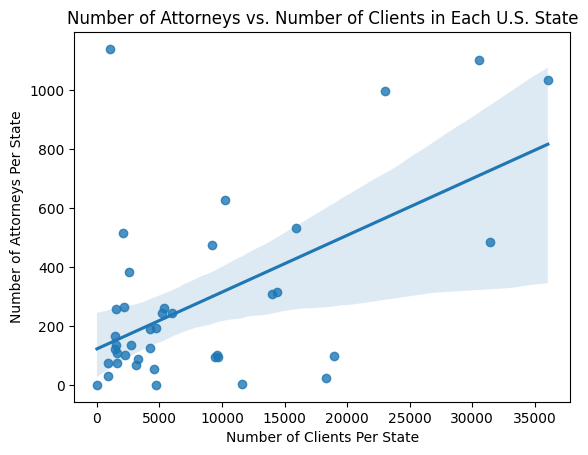

In [5]:
client_to_attorney_plot = sns.regplot(x = "Client State Count", y = "Attorney State Count", data = client_to_attorney)
client_to_attorney_plot.set_title("Number of Attorneys vs. Number of Clients in Each U.S. State")
client_to_attorney_plot.set_ylabel("Number of Attorneys Per State")
client_to_attorney_plot.set_xlabel("Number of Clients Per State")

Text(0.5, 1.0, 'Mean Number of Clients per Attorney for U.S. States')

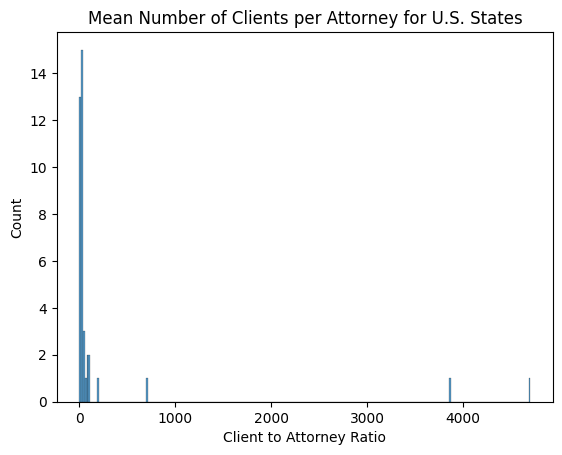

In [6]:
sns.histplot(x = "Client to Attorney Ratio", data = client_to_attorney).set_title("Mean Number of Clients per Attorney for U.S. States")

Text(0.5, 1.0, 'Mean Number of Clients per Attorney for U.S. States (limited to < 700 ratio)')

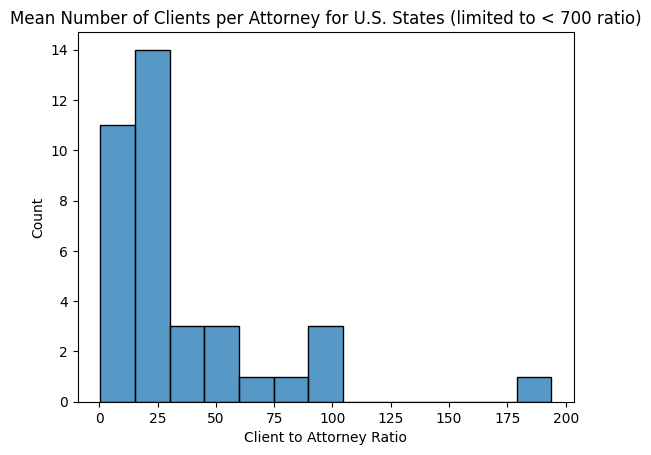

In [7]:
# Omit the three outliers to see more clearly that the number of clients per attorney in each state is skewed to the right.
client_to_attorney2 = client_to_attorney.loc[client_to_attorney["Client to Attorney Ratio"] < 700]
sns.histplot(x = "Client to Attorney Ratio", data = client_to_attorney2).set_title("Mean Number of Clients per Attorney for U.S. States (limited to < 700 ratio)")

In [19]:
client_attorney_fig = go.Figure(data = go.Choropleth(
    locations = client_to_attorney2["State"], 
    z = client_to_attorney2["Client to Attorney Ratio"].astype(float), 
        locationmode = "USA-states", 
        colorscale = "Blues",
        colorbar = {"title": "Number of Clients Per Attorney"}))
client_attorney_fig.update_layout(geo_scope = "usa", 
                  title_text = "Number of Clients Per Attorney in Each U.S. State (limited to < 700 ratios)")
py.plot(client_attorney_fig)

'temp-plot.html'

In [9]:
time = pd.DataFrame(questions["StateAbbr"])
time["AskTime"] = pd.to_datetime(questions["AskedOnUtc"])
time["ClosedTime"] = pd.to_datetime(questions["ClosedOnUtc"])
time["TimeDifference"] = time["ClosedTime"] - time["AskTime"] 
time.head()

,StateAbbr,AskTime,ClosedTime,TimeDifference
0,NC,2019-06-19 22:10:06,2019-08-13 15:09:06,54 days 16:59:00
1,NC,2019-06-19 23:34:36,2019-08-13 15:09:14,54 days 15:34:38
2,NC,2019-06-19 23:57:18,2019-06-24 19:02:35,4 days 19:05:17
3,NC,2019-06-20 02:33:14,2019-07-31 05:49:18,41 days 03:16:04
4,NC,2019-06-20 17:04:47,2019-08-13 15:09:20,53 days 22:04:33
...,...,...,...,...
202874,NC,2019-06-17 20:37:01,2019-07-27 19:26:43,39 days 22:49:42
202875,NC,2019-06-18 13:06:00,2019-06-24 19:02:56,6 days 05:56:56
202876,NC,2019-06-18 15:33:13,2019-08-13 15:10:18,55 days 23:37:05
202877,NC,2019-06-19 03:23:46,2019-06-28 21:59:13,9 days 18:35:27


In [10]:
time_diff = pd.DataFrame(time.groupby("StateAbbr", as_index = False).TimeDifference.mean())
time_diff["TimeDifference"] = time["TimeDifference"].astype(int)/ 10**9 / 86400
time_diff.head()

,StateAbbr,TimeDifference
0,AK,54.707639
1,AL,54.649051
2,AR,4.795336
3,AZ,41.136157
4,CA,53.919826


Text(0.5, 0, 'Difference in Time (Days)')

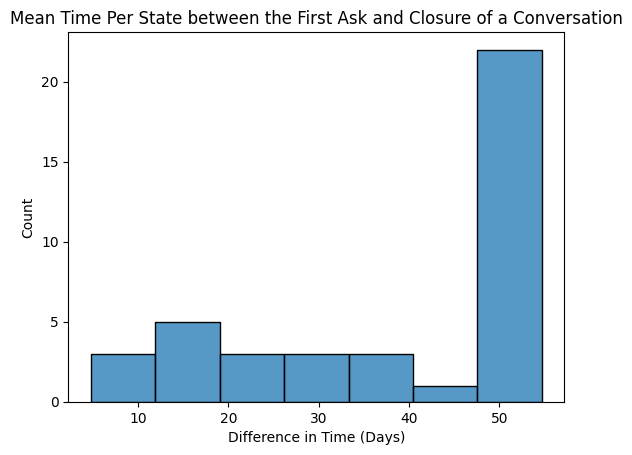

In [11]:
time_diff_histplot = sns.histplot(x = "TimeDifference", data = time_diff)
time_diff_histplot.set_title("Mean Time Per State between the First Ask and Closure of a Conversation") 
time_diff_histplot.set_xlabel("Difference in Time (Days)")

In [12]:
# Choropleth Map of the Mean Time to Close a Conversation Per State
fig = go.Figure(data = go.Choropleth(
    locations = time_diff["StateAbbr"], 
    z = time_diff["TimeDifference"].astype(float), 
        locationmode = "USA-states", 
        colorscale = "Blues",
        colorbar = {"title": "Time in Seconds"}))
fig.update_layout(geo_scope = "usa", 
                  title_text = "Mean Time to Close Pro-Bono Legal Service Conversations Per State")
py.plot(fig)

'temp-plot.html'

In [13]:
attorney_questions = pd.merge(questions, attorneys, how = "inner", left_on = "TakenByAttorneyUno", right_on = "AttorneyUno", suffixes = ("", "Attorney"))

In [14]:
client_questions = pd.merge(questions, clients, how = "inner", left_on = "AskedByClientUno", right_on = "ClientUno", suffixes = ("", "Attorney"))

# Future ideas
- Analyze frequency of words with TF-IDF/scikit-learn

In [16]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import TfidfVectorizer
# question_posts = pd.read_csv("questionposts.csv", on_bad_lines = 'skip')
# question_posts_text = pd.DataFrame()
# question_posts_text["Conversation Text"] = question_posts["PostText"]
# question_posts_text = question_posts_text["Conversation Text"].apply(lambda x: np.str_(x))
# # question_posts_text = question_posts["PostText"].to_numpy()
# question_posts_text.sample(frac = 0.000005, random_state = 1)

In [17]:
# countvectorizer = CountVectorizer(analyzer = "word", stop_words= "english")
# tfidfvectorizer = TfidfVectorizer(analyzer = "word", stop_words= "english")
# count_wm = countvectorizer.fit_transform(question_posts_text)
# tfidf_wm = tfidfvectorizer.fit_transform(question_posts_text)
# count_tokens = countvectorizer.get_feature_names_out()
# tfidf_tokens = tfidfvectorizer.get_feature_names_out()
# df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1'],columns = count_tokens)
# df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1'],columns = tfidf_tokens)

In [18]:
# print("Count Vectorizer\n")
# print(df_countvect)
# print("\nTD-IDF Vectorizer\n")
# print(df_tfidfvect)